In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
DATA_PATH = '../data/cleaned_data.csv'
try:
    data_df = pd.read_csv(DATA_PATH)
    print(f"Sikeres betöltés! Méret: {data_df.shape}")
    display(data_df.head())
except FileNotFoundError:
    print("HIBA: Nem találom a fájlt!")

C:\Users\manle\AppData\Local\Temp\ipykernel_4772\663251865.py:3: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(DATA_PATH)


Sikeres betöltés! Méret: (19531015, 16)


,trip_id,timestamp_utc,final_delay,delay_seconds,current_stop_sequence,speed,heading,lat,lon,hour_sin,hour_cos,day_sin,day_cos,is_weekend,route_id,stop_id
0,1403_38,2025-10-17 06:06:54,0.0,0,12,26.666666,308.0,47.458679,19.291910,1.0,6.123234e-17,-0.433884,-0.900969,0,EC,005510017_0
1,1403_38,2025-10-17 06:07:55,0.0,0,12,26.111111,308.0,47.461609,19.286369,1.0,6.123234e-17,-0.433884,-0.900969,0,EC,005510017_0
2,1403_38,2025-10-17 06:08:55,0.0,0,12,27.777779,282.0,47.467449,19.254990,1.0,6.123234e-17,-0.433884,-0.900969,0,EC,005510017_0
3,1403_38,2025-10-17 06:09:56,0.0,0,12,27.222221,298.0,47.470650,19.236191,1.0,6.123234e-17,-0.433884,-0.900969,0,EC,005510017_0
4,1403_38,2025-10-17 06:10:56,0.0,0,12,27.500000,298.0,47.473701,19.227850,1.0,6.123234e-17,-0.433884,-0.900969,0,EC,005510017_0


In [ ]:
X = data_df[['delay_seconds']] 

y = data_df['final_delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
y_pred_naive = X_test['delay_seconds']
mae_naive = mean_absolute_error(y_test, y_pred_naive)
rmse_naive = np.sqrt(mean_squared_error(y_test, y_pred_naive))
r2_naive = r2_score(y_test, y_pred_naive)

In [5]:
print(f"MAE (Átlagos hiba): {mae_naive/60:.2f} perc")
print(f"RMSE:               {rmse_naive/60:.2f} perc")
print(f"R2 Score:           {r2_naive:.4f}")

MAE (Átlagos hiba): 4.41 perc
RMSE:               10.25 perc
R2 Score:           -0.1291


In [6]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)
mae_reg = mean_absolute_error(y_test, y_pred_reg)
rmse_reg = np.sqrt(mean_squared_error(y_test, y_pred_reg))
r2_reg = r2_score(y_test, y_pred_reg)

In [7]:
print(f"MAE (Átlagos hiba): {mae_reg/60:.2f} perc")
print(f"RMSE:               {rmse_reg/60:.2f} perc")
print(f"R2 Score:           {r2_reg:.4f}")

MAE (Átlagos hiba): 4.73 perc
RMSE:               9.44 perc
R2 Score:           0.0422


In [8]:
coefficient = reg.coef_[0]
intercept = reg.intercept_

print(f"\nMegtanult összefüggés:")
print(f"Final Delay = {coefficient:.3f} * Current Delay + {intercept:.2f} sec")

if coefficient < 1:
    print("-> Elemzés: A modell szerint a buszok átlagosan behozzák a késést (Recovery).")
else:
    print("-> Elemzés: A modell szerint a késés átlagosan növekszik (Accumulation).")


Megtanult összefüggés:
Final Delay = 0.412 * Current Delay + 197.27 sec
-> Elemzés: A modell szerint a buszok átlagosan behozzák a késést (Recovery).


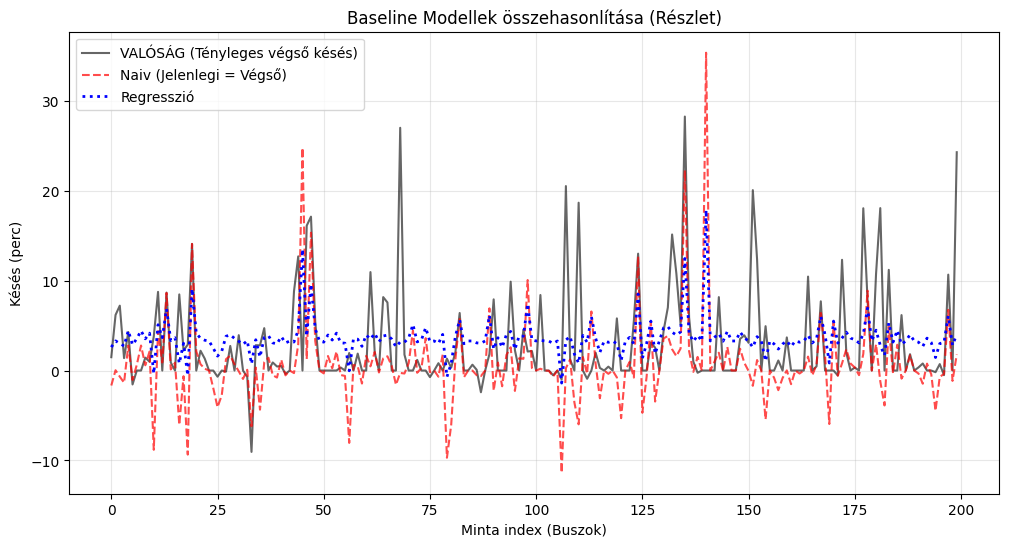

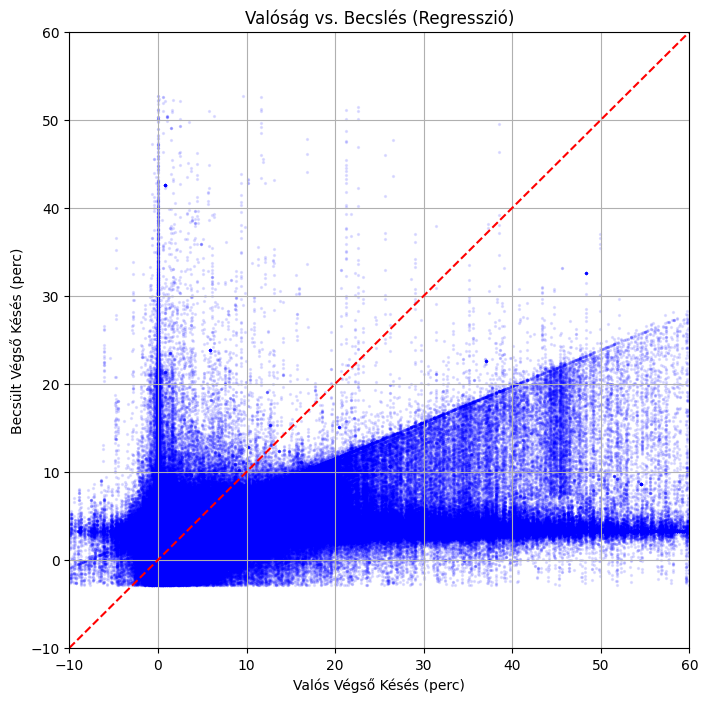

In [ ]:
plt.figure(figsize=(12, 6))

limit = 200
x_ax = range(limit)

plt.plot(x_ax, y_test.values[:limit]/60, label="VALÓSÁG (Tényleges végső késés)", color="black", alpha=0.6)
plt.plot(x_ax, y_pred_naive.values[:limit]/60, label="Naiv (Jelenlegi = Végső)", color="red", linestyle="--", alpha=0.7)
plt.plot(x_ax, y_pred_reg[:limit]/60, label="Regresszió", color="blue", linestyle=":", linewidth=2)

plt.title("Baseline Modellek összehasonlítása (Részlet)")
plt.ylabel("Késés (perc)")
plt.xlabel("Minta index (Buszok)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y_test/60, y_pred_reg/60, alpha=0.1, s=2, color='blue')
plt.plot([-10, 60], [-10, 60], color='red', linestyle='--') 
plt.title("Valóság vs. Becslés (Regresszió)")
plt.xlabel("Valós Végső Késés (perc)")
plt.ylabel("Becsült Végső Késés (perc)")
plt.xlim(-10, 60)
plt.ylim(-10, 60)
plt.grid(True)
plt.show()